In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv("mca.csv")

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_test=pd.read_csv('preprocessed_test_df.csv')

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_train.head()

,visitNumber,visitId,visitStartTime,date,visits,hit,Pageviews,timeOnSite,transactions,transactionRevenue,...,Continent,subContinent,country,region,metro,city,networkDomain,fullVisitorId,channelGrouping,socialEngagementType
0,1.0,1.470041e+09,1.470041e+09,20160801.0,1.0,1.0,1.0,None,None,None,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,2.490000e+18,Social,Not Socially Engaged
1,1.0,1.470046e+09,1.470046e+09,20160801.0,1.0,1.0,1.0,None,None,None,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,9.290000e+17,Social,Not Socially Engaged
2,1.0,1.470113e+09,1.470113e+09,20160801.0,1.0,1.0,1.0,None,None,None,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1.620000e+18,Social,Not Socially Engaged
3,1.0,1.470163e+09,1.470163e+09,20160802.0,1.0,1.0,1.0,None,None,None,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,7.210000e+18,Social,Not Socially Engaged
4,1.0,1.470286e+09,1.470286e+09,20160803.0,1.0,1.0,1.0,None,None,None,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,5.090000e+18,Social,Not Socially Engaged


In [5]:
names=df_train.columns

In [6]:
print(names)

Index(['visitNumber', 'visitId', 'visitStartTime', 'date', 'visits', 'hit',
       'Pageviews', 'timeOnSite', 'transactions', 'transactionRevenue',
       'totalTransactionRevenue', 'sessionQualityDim', 'referralPath',
       'campaign', 'source', 'medium', 'keyword', 'adContent', 'browser',
       'operatingSystem', 'isMobile', 'deviceCategory', 'Continent',
       'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain',
       'fullVisitorId', 'channelGrouping', 'socialEngagementType'],
      dtype='object')


In [7]:
df_train = df_train.rename(columns={"sessionQualityDim":"totals.sessionQualityDim","timeOnSite":"totals.timeOnSite","keyword":"trafficSource.keyword",
                                   "referralPath":"trafficSource.referralPath","adContent":"trafficSource.adContent","transactions":"totals.transactions",
                                   "transactionRevenue":"totals.transactionRevenue"})

**totals.sessionQualityDim:**
> - AN ESTIMATION OF HOW SESSION WAS CLOSE TO AN TRANSCATION.
> - RANGES-(0,100)
> - IF NUMBER IS 1 INDICATES POOR SESSION QUALITY, IF NUMBER CLOSE TO 100 SHOWS HIGH SESSION QUALITY .
> -  REPLACE "NONE" WITH 0 .

**0 INDICATES SESSION QUALITY IS NOT CALCULATED.**

In [8]:
df_train['totals.sessionQualityDim'].fillna(0, inplace=True)

df_test['totals.sessionQualityDim'].fillna(0, inplace=True)

- **totals.timeOnSite**
> *   INDICATES SECONDS THAT IS SPENT ON SITE BY ONE USER.
> *   REPLACING IT WITH ZERO WHERE "NONE" IS PRESENT


In [9]:
df_train['totals.timeOnSite'].fillna(0, inplace=True)

df_test['totals.timeOnSite'].fillna(0, inplace=True)

 **trafficSource.keyword**:

> - For manual campaign tracking, it is the value of the utm_term campaign tracking parameter. Otherwise, its value is (not set)



In [11]:
df_train['trafficSource.keyword'].head(5)

0    None
1    None
2    None
3    None
4    None
Name: trafficSource.keyword, dtype: object

In [12]:
print("no.of unique values or keywords : {0}".format(df_train['trafficSource.keyword'].nunique()))
print("no.of records having 'nan' are : {0}".format(df_train['trafficSource.keyword'].astype(str).str.contains("nan").sum(axis=0)))
print("no.of records having '(not provided)' are : {0}".format(df_train['trafficSource.keyword'].astype(str).str.contains("(not provided)").sum(axis=0)))

no.of unique values or keywords : 2436
no.of records having 'nan' are : 5


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


no.of records having '(not provided)' are : 220543


In [13]:
df_train['trafficSource.keyword'].replace(['nan','NaN','(not provided)'], 'others',inplace=True)
df_train['trafficSource.keyword'].fillna('others', inplace=True)

In [14]:
df_test['trafficSource.keyword'].replace(['nan','NaN','(not provided)'], 'others',inplace=True)
df_test['trafficSource.keyword'].fillna('others', inplace=True)

In [15]:
df_train['trafficSource.keyword'].isnull().sum(axis=0)

0

**trafficSource.referralPath:**
>-  about 60% of data in this feature having 'nan'., so istead of performing any imputation we will leave as is ., so at the time of label encoding all nan's are consider as one categgory

In [16]:
df_train['trafficSource.referralPath'].head(5)

0    /yt/about/
1    /yt/about/
2    /yt/about/
3    /yt/about/
4    /yt/about/
Name: trafficSource.referralPath, dtype: object

**trafficSource.adwordsClickInfo.gclId:**
>-this feature is missing in 95% of data so it's better to drop this feature.

**trafficSource.adwordsClickInfo.page:**
>-this feature also missing in 95% of data ., so instead of assuming all missing values are zero we will drop this feature

**trafficSource.adwordsClickInfo.slot:**
>-this feature also missing in 95% of data ., so instead of assuming all missing values are another category "others" simply we will drop this feature

**trafficSource.adwordsClickInfo.adNetworkType:**
>-this feature also missing in 95% of data ., so instead of assuming all missing values are another category "others" simply we will drop this feature

**trafficSource.adContent:**
>-this feature had about 95% of misssing data ., but 5 % present data seems to be informative regarding ads., so all missing data consider as one category at the of label encoding.

In [17]:

df_train['trafficSource.adContent'].unique()

array([' None', " 'Full auto ad IMAGE ONLY'", " 'Ad from 11/3/16'",
       " {KeyWord:Google Men's T-Shirts}", " 'Ad from 11/7/16'",
       " '{KeyWord", " 'Ad from 12/13/16'", " 'LeEco_1a'",
       " 'Display Ad created 3/11/14'", " 'JD_5a_v1'",
       " 'First Full Auto Template Test Ad'",
       " 'Full auto ad TEXT/NATIVE'", " 'Google Online Store'",
       " 'Google Merchandise Collection'",
       " 'Display Ad created 11/17/14'", " 'Display Ad created 3/11/15'",
       " '20% discount'", " 'Ad from 2/17/17'", " 'Google Merchandise'",
       " 'Want Google Sunglasses'", " 'Google Store'",
       " 'Swag with Google Logos'", " 'Full auto ad TEXT ONLY'",
       " 'Google Paraphernalia'", " 'GA Help Center'",
       " 'Full auto ad NATIVE ONLY'", " 'url_builder'",
       "//www.googlemerchandisestore.com/shop.axd/Home'",
       "//www.googlemerchandisestore.com'",
       "//www.googlemerchandisestore.com/'", "//m.youtube.com'",
       "//www.raterhub.com/url'",
       "//www.youtube

In [18]:
df_train['totals.transactions'].fillna(0, inplace=True)
df_train['totals.transactions'].fillna(0, inplace=True)

In [19]:
df_train['totals.transactionRevenue'].fillna(0, inplace=True)
df_test['totals.transactionRevenue'].fillna(0, inplace=True)

In [20]:
df_train.replace(to_replace=" None", value=0,inplace=True)

In [21]:
df_train.head()

,visitNumber,visitId,visitStartTime,date,visits,hit,Pageviews,totals.timeOnSite,totals.transactions,totals.transactionRevenue,...,Continent,subContinent,country,region,metro,city,networkDomain,fullVisitorId,channelGrouping,socialEngagementType
0,1.0,1.470041e+09,1.470041e+09,20160801.0,1.0,1.0,1.0,0,0,0,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,2.490000e+18,Social,Not Socially Engaged
1,1.0,1.470046e+09,1.470046e+09,20160801.0,1.0,1.0,1.0,0,0,0,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,9.290000e+17,Social,Not Socially Engaged
2,1.0,1.470113e+09,1.470113e+09,20160801.0,1.0,1.0,1.0,0,0,0,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1.620000e+18,Social,Not Socially Engaged
3,1.0,1.470163e+09,1.470163e+09,20160802.0,1.0,1.0,1.0,0,0,0,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,7.210000e+18,Social,Not Socially Engaged
4,1.0,1.470286e+09,1.470286e+09,20160803.0,1.0,1.0,1.0,0,0,0,...,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,5.090000e+18,Social,Not Socially Engaged


## EDA

In [22]:
import pandas as pd
import dask.dataframe as dd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

C:\Users\hp\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


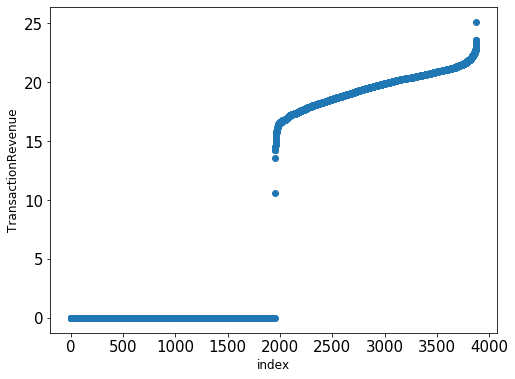

In [34]:

df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].astype('float') # converting to 'float' datatype
temp = df_train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index() # for each user we are taking sum of  
                                                                                       # all his transactions

plt.figure(figsize=(8,6))
plt.scatter(range(temp.shape[0]),np.sort(np.log1p(temp["totals.transactionRevenue"].values))) # log(transaction_revenue)
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()


- RESAMPLED DATA GIVES AN O/P OF AROUND 50-50 OF NON TRANSCATION AND TRANSACTION DATA

In [24]:
non_zero_Revenue_records = 0
unique_users_with_non_zero_revenue = set()
 
for i,j in zip(df_train['totals.transactionRevenue'],df_train['fullVisitorId']):
    if i>0:
        non_zero_Revenue_records += 1
        unique_users_with_non_zero_revenue.add(j)

print("total no.of transactions with non-zero revenue out of: {0} are: {1} and \
which is about :{2} %".format(df_train.shape[0],non_zero_Revenue_records,(non_zero_Revenue_records*100)/(df_train.shape[0])))

print("\n")

print("out of {0} customers only {1} customers are generating revenue and which is about: {2}%" \
      .format(df_train['fullVisitorId'].nunique(),len(unique_users_with_non_zero_revenue),(len(unique_users_with_non_zero_revenue))*100/df_train['fullVisitorId'].nunique()))

total no.of transactions with non-zero revenue out of: 898309 are: 11437 and which is about :1.2731699225990165 %


out of 3877 customers only 1928 customers are generating revenue and which is about: 49.729172040237295%


In [25]:
print("common users between train and test are: ",len(set(df_train.fullVisitorId).intersection(set(df_test.fullVisitorId))))

common users between train and test are:  0


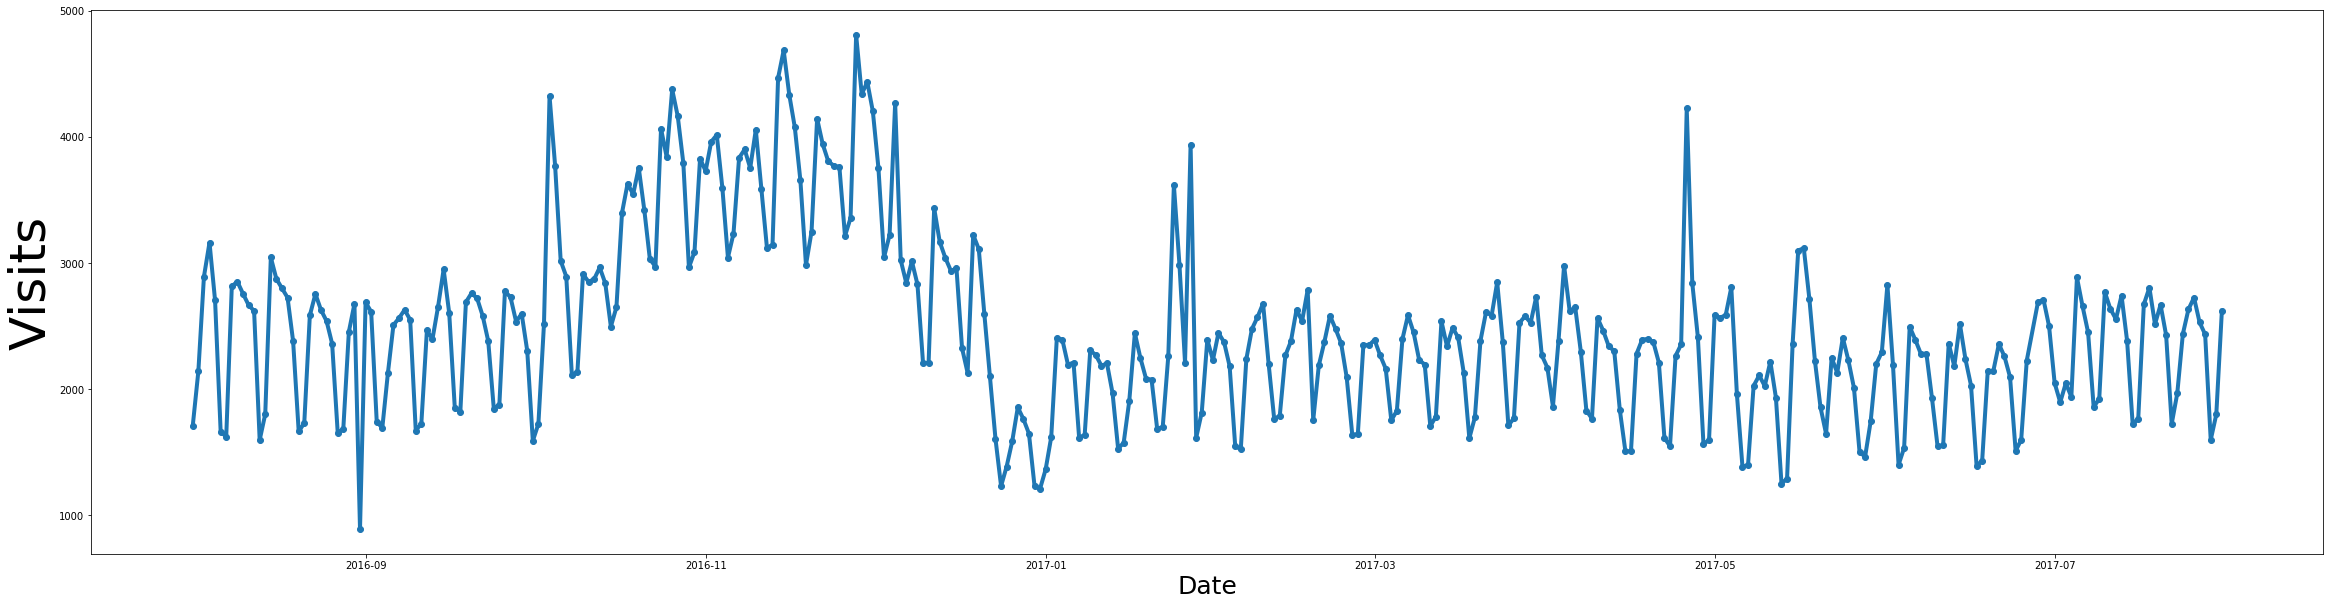

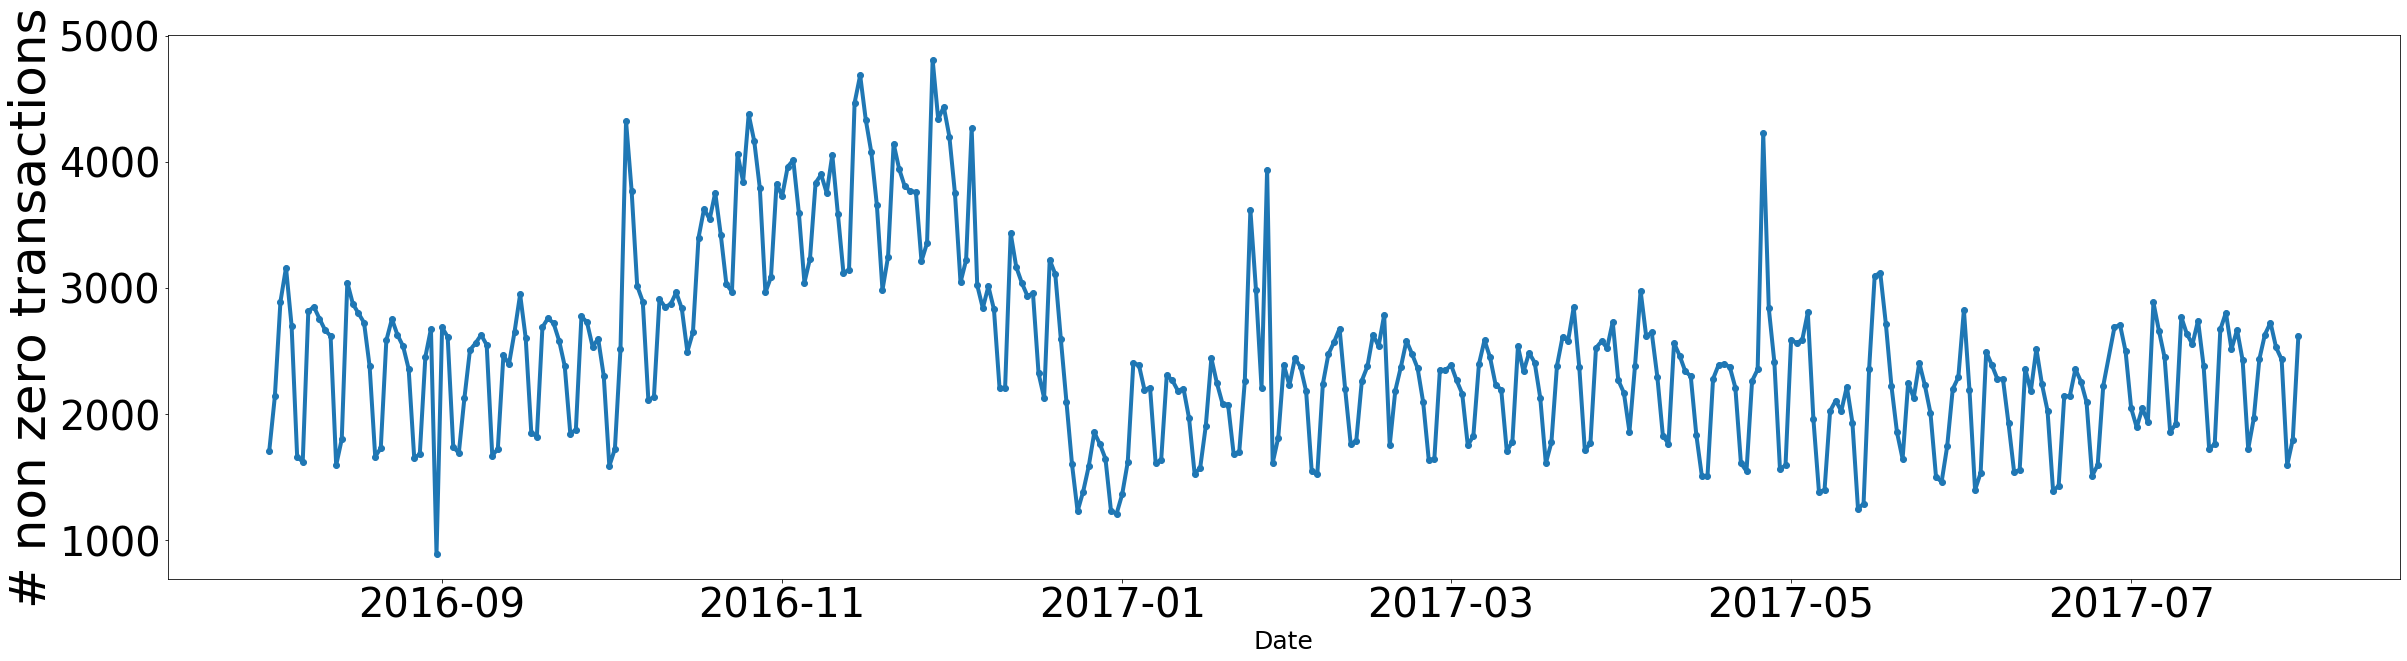

In [26]:
df_train["date"] = pd.to_datetime(df_train["date"], infer_datetime_format=True, format="%Y%m%d") # convert date feature into 
                                                                                                 # exact date format
    

# Compute count of group, excluding missing values(include only non zero values).
counts_group_date = df_train.groupby('date').count()
counts_group_date.reset_index(inplace=True) #it will create indexes from zero to len(dataframe)


# plot for no.of visits in each date :

plt.figure(figsize=(40,10))
plt.plot_date(x = counts_group_date['date'], y = counts_group_date['fullVisitorId'],linestyle='solid',linewidth=4)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Visits',fontsize=50)
plt.rc('xtick', labelsize=40) #increases the value's font on x-axis
plt.rc('ytick', labelsize=40) #increases the value's font on y-axis
plt.autoscale(True)
plt.show()

# plot for transcation revenue in each date :

plt.figure(figsize=(40,10))
plt.plot_date(x = counts_group_date['date'], y = counts_group_date['totals.transactionRevenue'],linestyle='solid',linewidth=4)
plt.xlabel('Date',fontsize=25)
plt.ylabel('# non zero transactions',fontsize=50)
plt.rc('xtick', labelsize=40) #increases the value's font on x-axis
plt.rc('ytick', labelsize=40) #increases the value's font on x-axis
plt.autoscale(True)
plt.show()

- THESE PEAKS TELL THE ANALYTICS TEAM ABOUT HOW TRANSACTION AND VISITS ARE DIRECTLY PROPRTIONAL TO EACH OTHER.
- HIGHER THE VISITS IN MONTH MORE THE NON ZERO TRANSCATION

Text(0, 0.5, 'Transaction Revenue in Millions')

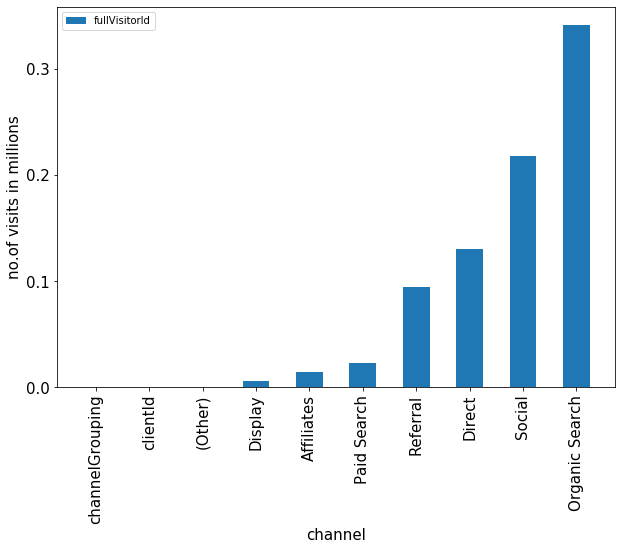

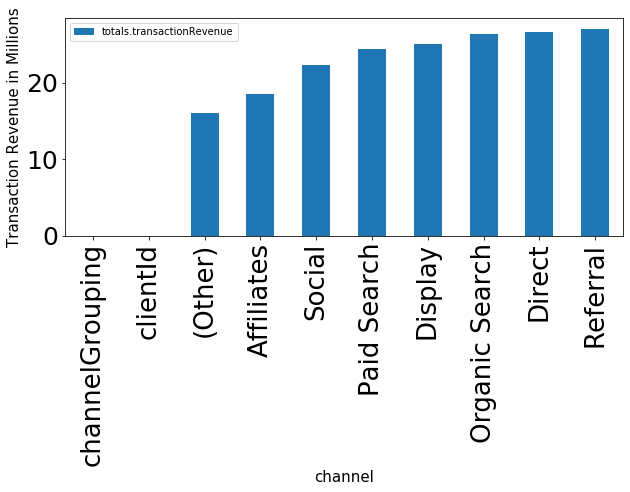

In [35]:
temp_1 = df_train.groupby('channelGrouping')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("channelGrouping")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each channel plot: 
# --------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**6)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='channelGrouping',y='fullVisitorId',figsize=(10,7))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=26) # x- axis value's font size
plt.rc('ytick', labelsize=25) # y- axis value's font size

plt.xlabel('channel', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in millions', fontsize=15) # y- axis label and font size


# for revenue in each channel plot: 
# --------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='channelGrouping',y='totals.transactionRevenue',figsize=(10,4))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=26) # x- axis value's font size
plt.rc('ytick', labelsize=25) # y- axis value's font size

plt.xlabel('channel', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) 

ABOVE GRAPH SHOWS THAT :

- EVEN THOUGH VISITS ARE LESS IN CHANNEL LIKE DISPLAY AND AFFLICATED THEY CONTRIBUTE ALOT ON TOTAL TRANSACTION , HENCE HERE MORE MONEY CAN BE INVESTED .
- SECONDLY REFRRAL AND ORGANIC SEARCH HAVE AHIGH VISIT NUMBER , REDUCING AD COST ON THESE CHANNEL WOUL STILL MAINTAIN TRANSACTION REVENUE GENRATED BY THEM

Text(0, 0.5, 'Transaction Revenue in Millions')

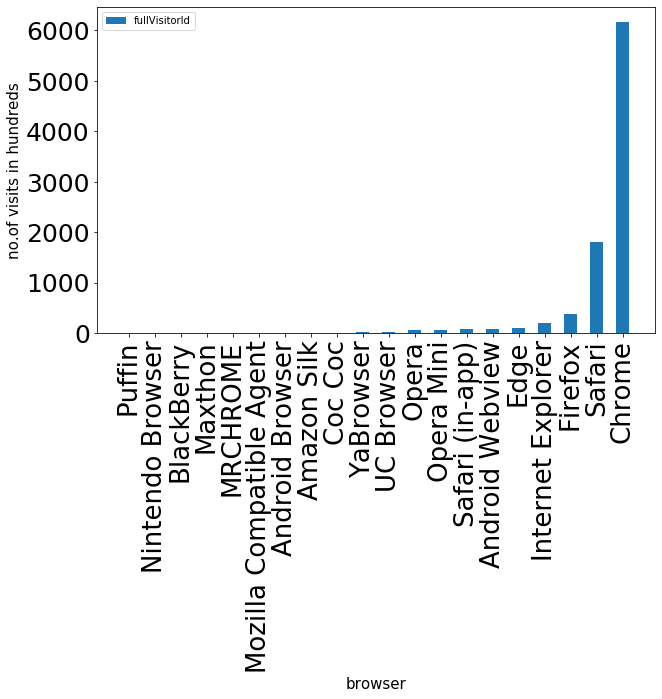

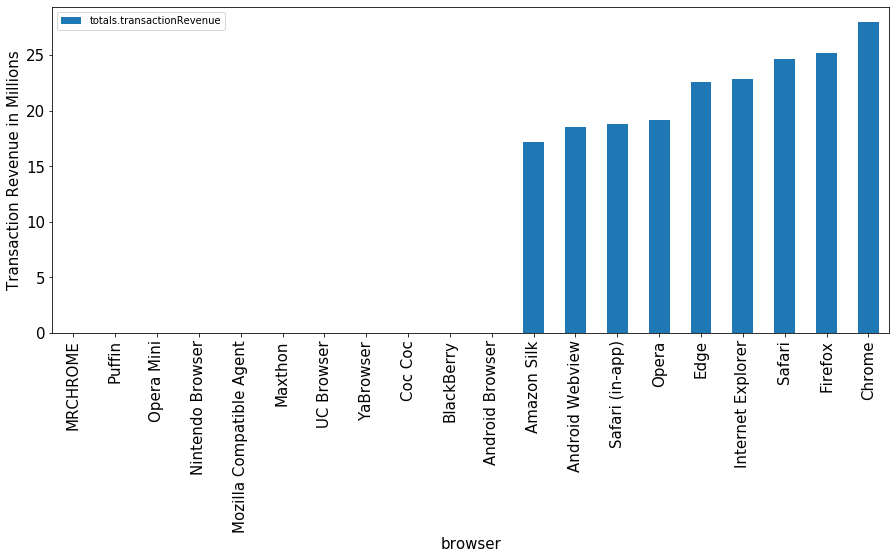

In [28]:
temp_1 = df_train.groupby('browser')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("browser")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions

top_20_browsers = df_train['browser'].value_counts()[:20].index.tolist() # list the top 20 browsers
temp_1 = temp_1[temp_1['browser'].isin(top_20_browsers)].reset_index()                 # taking only top-20 brosers group
temp_2 = temp_2[temp_2['browser'].isin(top_20_browsers)].reset_index()                 #  taking only top-20 brosers group 

# for no.of visits in each operatingSystem plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/10**2
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='browser',y='fullVisitorId',figsize=(10,6))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('browser', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in hundreds', fontsize=15) # y- axis label and font size


# for revenue in each operatingSystem plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='browser',y='totals.transactionRevenue',figsize=(15,6))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('browser', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15)

- CHROME CONTRIBUTES MAX TO THE REVENUE 
- EVEN IF VISITS ARE LESS IN OPERA , ANDROID WEBVIEWER , INTERNET EXPLORER  THEY CONTRIBUTE ALOT IN REVENUE **THESE CHANNEL ARE GOOD TO INVEST FOR AD TO GET MORE REVENUE (INCREASE THE ROI)**

In [29]:
df_train = df_train.rename(columns={"operatingSystem":"device.operatingSystem"})

Text(0, 0.5, 'Transaction Revenue in Millions')

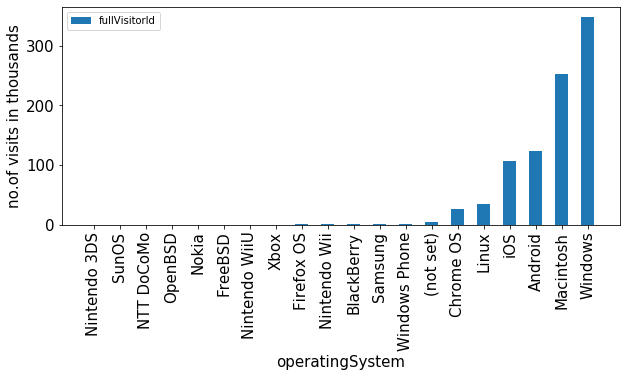

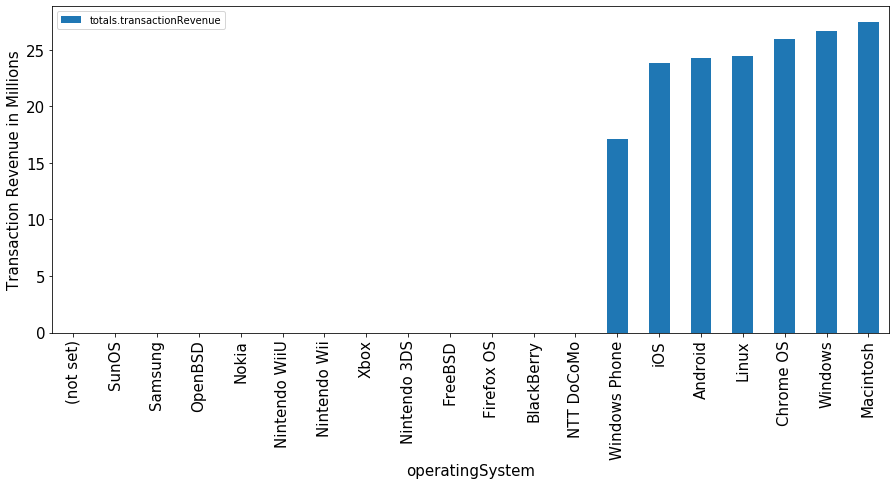

In [30]:
temp_1 = df_train.groupby('device.operatingSystem')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("device.operatingSystem")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each operatingSystem plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**3)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='device.operatingSystem',y='fullVisitorId',figsize=(10,4))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('operatingSystem', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in thousands', fontsize=15) # y- axis label and font size


# for revenue in each operatingSystem plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='device.operatingSystem',y='totals.transactionRevenue',figsize=(15,6))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('operatingSystem', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) 

- THOUGH VISITS IN MACINTOSH IS QUITE LESS THEN WINDOWS IT CONTRIBUTES MAX. IN REVENUE 
- IOS , ANDROID , LINUX HAVE LESS VISIT BUT HAVE HIGH VALUE IN GENERATION OF TRANSACTION REVENUE 
- **ANALYTICS TEAM CAN INVEST MORE ON THESE OS TO GET BETTER AD REVENUE**

Text(0, 0.5, 'Transaction Revenue in Millions')

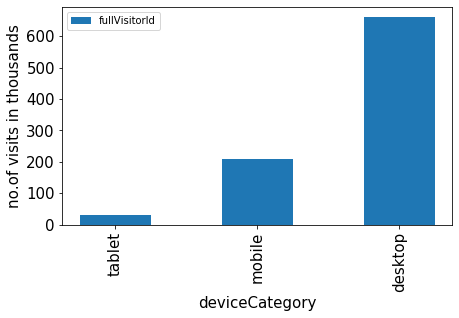

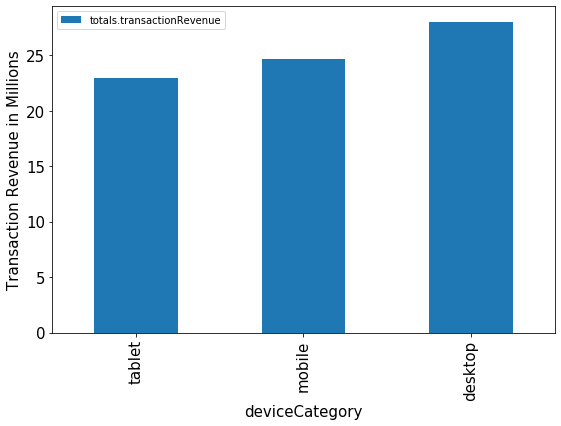

In [31]:
df_train = df_train.rename(columns={"deviceCategory":"device.deviceCategory"})

temp_1 = df_train.groupby('device.deviceCategory')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("device.deviceCategory")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each device category plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**3)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='device.deviceCategory',y='fullVisitorId',figsize=(7,4))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('deviceCategory', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in thousands', fontsize=15) # y- axis label and font size


# for revenue in each device category plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='device.deviceCategory',y='totals.transactionRevenue',figsize=(9,6))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('deviceCategory', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) # y- axis

- TABLET HAVE LOW VISITS BUT GOOD TRANSACTION CONTRIBUTION 
- SUGGESTES THAT EVEN IF WE CONTRIBUTE LESS IN TABLET ADS IT WILL GENERATE GOOD REVENUE

Text(0, 0.5, 'Transaction Revenue in Millions')

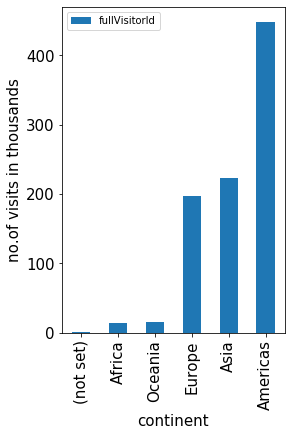

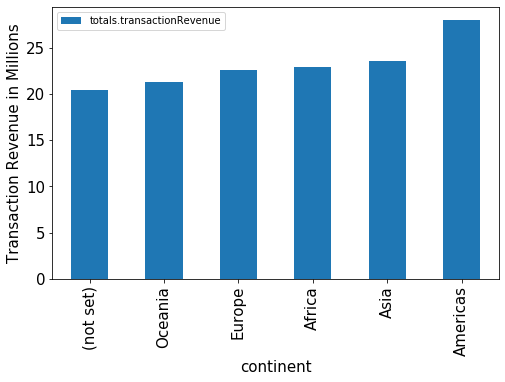

In [32]:
df_train = df_train.rename(columns={"Continent":"geoNetwork.continent"})
temp_1 = df_train.groupby('geoNetwork.continent')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("geoNetwork.continent")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each continent plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**3)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='geoNetwork.continent',y='fullVisitorId',figsize=(4,6))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('continent', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in thousands', fontsize=15) # y- axis label and font size


# for revenue in each continent plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='geoNetwork.continent',y='totals.transactionRevenue',figsize=(8,5))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('continent', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) # y- axis label and font size